In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = 12,8

In [2]:
# read in data - data in same folder as notebook

movies = pd.read_csv('movies.csv')

In [3]:
# seems data only goes up to 2020

movies
# movies.dtypes


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# data cleaning - #get percent missing in each column

# na_index = [] #get index of NA per column
na_per = [] 

for col in movies.columns:
    # na_index.append(np.where(movies[col].isna()))
    col_per = round(np.mean(movies[col].isna()) * 100, 2)
    print(f'{col} : {col_per} %')
    na_per.append(col_per)
    

name : 0.0 %
rating : 1.0 %
genre : 0.0 %
year : 0.0 %
released : 0.03 %
score : 0.04 %
votes : 0.04 %
director : 0.0 %
writer : 0.04 %
star : 0.01 %
country : 0.04 %
budget : 28.31 %
gross : 2.46 %
company : 0.22 %
runtime : 0.05 %


In [5]:
movies[['year', 'released']][240:250] #noticed some years dont match released like 248, google says released is correct

,year,released
240,1982,"July 23, 1982 (United States)"
241,1982,"May 21, 1982 (United States)"
242,1982,"July 23, 1982 (United States)"
243,1982,"February 18, 1983 (United States)"
244,1982,"July 30, 1982 (United States)"
245,1982,"July 16, 1982 (United States)"
246,1982,"March 19, 1982 (United States)"
247,1982,"November 19, 1982 (United States)"
248,1982,"February 4, 1983 (United States)"
249,1982,"December 10, 1982 (United States)"


In [6]:
para_index = movies['released'].astype(str).str.find('(')
year_indstart = para_index - 5
year_indend = para_index - 1

years_corrected = [] 
for i in range(len(movies['released'])):

    if isinstance(movies['released'][i],str):
        years_corrected.append(int(movies['released'][i][year_indstart[i]:year_indend[i]]))
    else:
        years_corrected.append(0)

movies['correct_year'] = years_corrected

In [7]:
# top grossing by 2020

movies.sort_values(by=['gross'], inplace = True, ascending = False)

<Axes: xlabel='budget', ylabel='gross'>

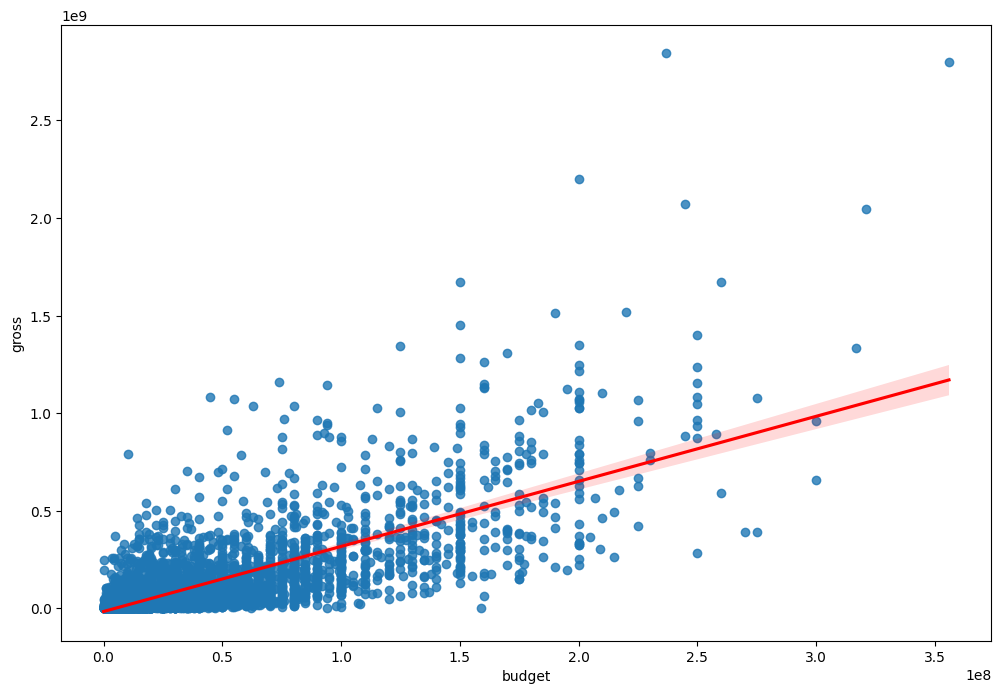

In [8]:
# regression plot

sns.regplot(x='budget', y='gross', data=movies, line_kws={'color': 'red'})

scatter plot indicates a positive correlation between budget and gross. More money in = more money out in general.

In [9]:
# using numeric features from movies, find correlation matrix

corr_matrix1 = movies[['budget', 'gross', 'runtime','score','votes','correct_year']].corr()
corr_matrix1

,budget,gross,runtime,score,votes,correct_year
budget,1.000000,0.740395,0.320447,0.076254,0.442429,0.321918
gross,0.740395,1.000000,0.245216,0.186258,0.630757,0.250514
runtime,0.320447,0.245216,1.000000,0.399451,0.309212,0.120636
score,0.076254,0.186258,0.399451,1.000000,0.409182,0.045473
votes,0.442429,0.630757,0.309212,0.409182,1.000000,0.070314
correct_year,0.321918,0.250514,0.120636,0.045473,0.070314,1.000000


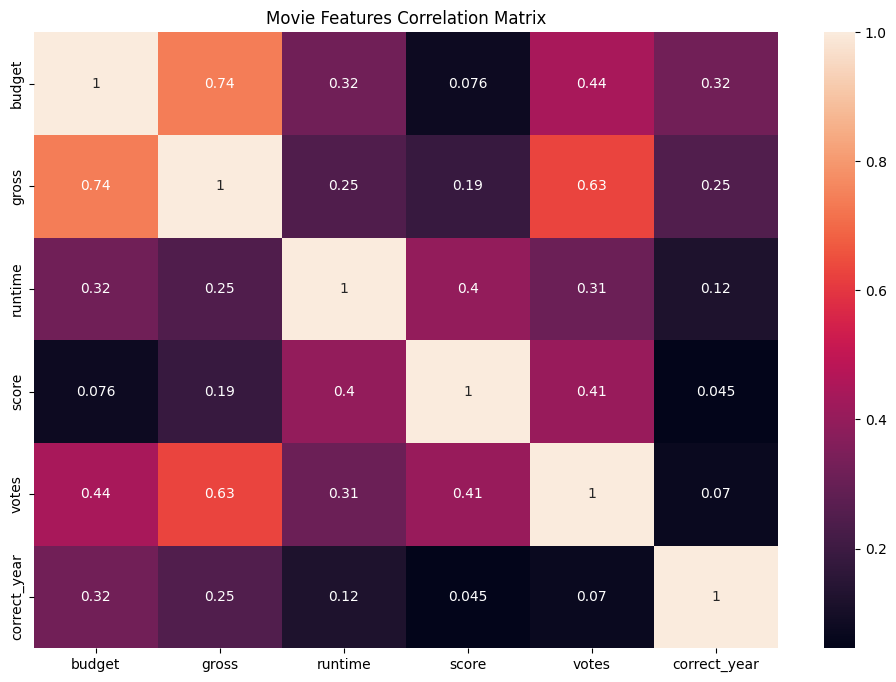

In [10]:
# visualize correlation using heatmap

sns.heatmap(corr_matrix1, annot=True)
plt.title('Movie Features Correlation Matrix')
plt.show()

In [11]:
# assign dummy variables to categorical variables

movies_conv = movies.copy()

for col in movies_conv.columns:
    if movies_conv[col].dtype == 'object':
        movies_conv[col] = movies_conv[col].astype('category')
        movies_conv[col] = movies_conv[col].cat.codes

movies_conv

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,2009
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,2019
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,1997
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,2015
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0,2020
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0,2020
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN,2020
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0,2020


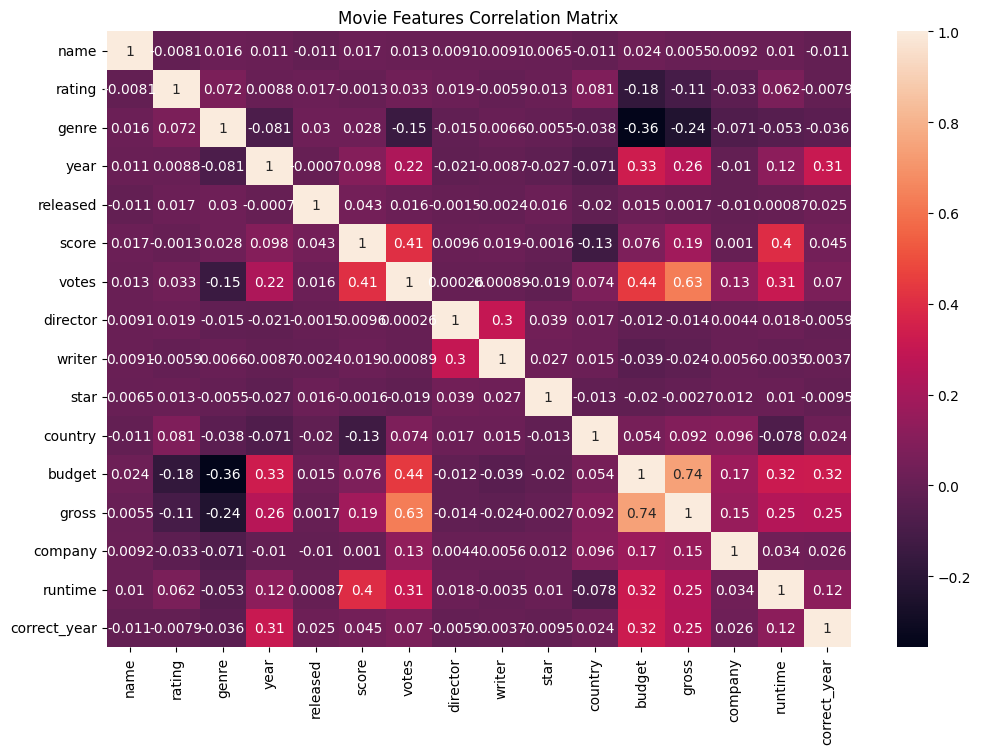

In [13]:
corr_matrix2 = movies_conv.corr()

sns.heatmap(corr_matrix2, annot=True)
plt.title('Movie Features Correlation Matrix')
plt.show()

In [16]:
# find correlation between pairs of features

corr_pairs = corr_matrix2.unstack().sort_values()

corr_pairs

genre         budget         -0.356564
budget        genre          -0.356564
genre         gross          -0.235650
gross         genre          -0.235650
rating        budget         -0.176002
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
Length: 256, dtype: float64

In [22]:
high_corr = corr_pairs[corr_pairs >= 0.5]
high_corr = high_corr[high_corr < 1]

high_corr

votes   gross     0.630757
gross   votes     0.630757
        budget    0.740395
budget  gross     0.740395
dtype: float64

From the data, we can see that the highest correlation to gross income are budget of movie, and movie votes. 

In [26]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [48]:
movies_conv.budget.fillna(movies_conv.budget.median(), inplace=True)
movies_conv.gross.fillna(movies_conv.gross.median(), inplace=True)
movies_conv.fillna(0, inplace=True)

In [49]:
movies_conv.isna().any()

name            False
rating          False
genre           False
year            False
released        False
score           False
votes           False
director        False
writer          False
star            False
country         False
budget          False
gross           False
company         False
runtime         False
correct_year    False
dtype: bool

In [52]:
y = movies_conv['gross']
x = movies_conv.drop('gross', axis=1)
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     1019.
Date:                Thu, 24 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:46:11   Log-Likelihood:            -1.5171e+05
No. Observations:                7668   AIC:                         3.035e+05
Df Residuals:                    7652   BIC:                         3.036e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.696e+08   2.06e+08     -2.278   

Multicollinearity between variables, can employ PCA to treat from sklearn.decomposition.